In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from PIL import Image

In [2]:
df = pd.read_csv('../Data/Masterchef.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        300 non-null    int64  
 1   text                           297 non-null    object 
 2   post_text                      288 non-null    object 
 3   shared_text                    16 non-null     object 
 4   original_text                  56 non-null     object 
 5   time                           300 non-null    object 
 6   timestamp                      300 non-null    int64  
 7   image                          151 non-null    object 
 8   image_lowquality               299 non-null    object 
 9   images                         298 non-null    object 
 10  images_description             298 non-null    object 
 11  images_lowquality              300 non-null    object 
 12  images_lowquality_description  300 non-null    obj

In [4]:
df.head(15)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,728166702677900,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,NaN,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,2023-11-24 00:00:00,1700758800,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7281...,"{'thích': 369, 'yêu thích': 68, 'thương thương...",440,NaN,126204090726016,NaN,7.281667e+14,['728166672677903'],False,2023-11-26 09:13:35.208990
1,727642092730361,The Thanksgiving dishes are cooking now... 🦃\n...,The Thanksgiving dishes are cooking now... 🦃\n...,NaN,The Thanksgiving dishes are cooking now... 🦃\n...,2023-11-23 01:16:11,1700676971,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 164, 'yêu thích': 28, 'thương thương...",193,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:51.364382
2,727607916067112,Who knew mashed potatoes were so complicated?!...,Who knew mashed potatoes were so complicated?!...,NaN,Who knew mashed potatoes were so complicated?!...,2023-11-23 00:02:37,1700672557,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 58, 'yêu thích': 3, 'thương thương': 1}",62,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:57.246897
3,723706983123872,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,NaN,NaN,2023-11-16 01:06:57,1700071617,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7237...,"{'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...",581,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:00.087903
4,722593639901873,Feel like your knife skills can't cut it? 🔪\n\...,Feel like your knife skills can't cut it? 🔪\n\...,NaN,NaN,2023-11-14 00:00:02,1699894802,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7225...,"{'thích': 109, 'yêu thích': 7}",116,NaN,126204090726016,NaN,7.225936e+14,['722593623235208'],False,2023-11-26 09:14:22.171084
5,720967230064514,Stir things up in the kitchen like Dino with t...,Stir things up in the kitchen like Dino with t...,NaN,Stir things up in the kitchen like Dino with t...,2023-11-11 02:00:21,1699642821,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7209...,"{'thích': 51, 'yêu thích': 7, 'thương thương': 1}",59,NaN,126204090726016,NaN,NaN,[],False,2023-11-26 09:14:28.054611
6,719836786844225,Wishing the very best day to the coolest guy I...,Wishing the very best day to the coolest guy I...,NaN,Wishing the very best day to the coolest guy I...,2023-11-09 00:31:19,1699464679,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7198...,"{'thích': 243, 'yêu thích': 60, 'thương thương...",310,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:39.872457
7,715013737326530,Looking to elevate your home cooking like your...,Looking to elevate your home cooking like your...,NaN,Looking to elevate your home cooking like your...,2023-10-31 02:00:01,1698692401,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,[],...

### SỐ LƯỢNG BÀI CÓ HÌNH ẢNH

In [5]:
num_images = len(df[df['image'].notna()])
print("Number of posts with images:", num_images)

Number of posts with images: 151


#### SỐ LƯỢNG BÀI LÀ VIDEO (df['image'] = NaN)

In [6]:
num_videos = len(df[df['video'].notna()])
print("Number of video posts:", num_videos)

Number of video posts: 131


### SỐ LƯỢNG BÀI VỪA CÓ HÌNH ẢNH VỪA CÓ VIDEO

In [7]:
num_posts_with_image_and_video = len(df[df['image'].notna() & df['video'].notna()])

print("Number of posts with both image and video:", num_posts_with_image_and_video)


Number of posts with both image and video: 0


### BÀI CHỈ CÓ HÌNH ẢNH

In [8]:
is_images_in_post = df['image'].notna()

In [9]:
post_with_images = df[is_images_in_post]
post_with_images.head(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,728166702677900,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,NaN,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,2023-11-24 00:00:00,1700758800,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7281...,"{'thích': 369, 'yêu thích': 68, 'thương thương...",440,NaN,126204090726016,NaN,7.281667e+14,['728166672677903'],False,2023-11-26 09:13:35.208990
1,727642092730361,The Thanksgiving dishes are cooking now... 🦃\n...,The Thanksgiving dishes are cooking now... 🦃\n...,NaN,The Thanksgiving dishes are cooking now... 🦃\n...,2023-11-23 01:16:11,1700676971,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 164, 'yêu thích': 28, 'thương thương...",193,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:51.364382
4,722593639901873,Feel like your knife skills can't cut it? 🔪\n\...,Feel like your knife skills can't cut it? 🔪\n\...,NaN,NaN,2023-11-14 00:00:02,1699894802,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7225...,"{'thích': 109, 'yêu thích': 7}",116,NaN,126204090726016,NaN,7.225936e+14,['722593623235208'],False,2023-11-26 09:14:22.171084
6,719836786844225,Wishing the very best day to the coolest guy I...,Wishing the very best day to the coolest guy I...,NaN,Wishing the very best day to the coolest guy I...,2023-11-09 00:31:19,1699464679,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7198...,"{'thích': 243, 'yêu thích': 60, 'thương thương...",310,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:39.872457
12,692457762915461,It was an incredible voyage across America thi...,It was an incredible voyage across America thi...,NaN,It was an incredible voyage across America thi...,2023-09-23 04:00:08,1695416408,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/6924...,"{'thích': 2971, 'yêu thích': 653, 'haha': 1, '...",3638,NaN,126204090726016,NaN,NaN,[],False,2023-11-26 09:17:10.668302


### BÀI CÓ VIDEO 

In [10]:
is_videos_in_post = df['image'].isna()

In [11]:
post_with_videos = df[is_videos_in_post]
post_with_videos.head(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
2,727607916067112,Who knew mashed potatoes were so complicated?!...,Who knew mashed potatoes were so complicated?!...,NaN,Who knew mashed potatoes were so complicated?!...,2023-11-23 00:02:37,1700672557,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 58, 'yêu thích': 3, 'thương thương': 1}",62,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:57.246897
3,723706983123872,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,NaN,NaN,2023-11-16 01:06:57,1700071617,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7237...,"{'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...",581,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:00.087903
5,720967230064514,Stir things up in the kitchen like Dino with t...,Stir things up in the kitchen like Dino with t...,NaN,Stir things up in the kitchen like Dino with t...,2023-11-11 02:00:21,1699642821,NaN,https://scontent.fhan14-1.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7209...,"{'thích': 51, 'yêu thích': 7, 'thương thương': 1}",59,NaN,126204090726016,NaN,NaN,[],False,2023-11-26 09:14:28.054611
7,715013737326530,Looking to elevate your home cooking like your...,Looking to elevate your home cooking like your...,NaN,Looking to elevate your home cooking like your...,2023-10-31 02:00:01,1698692401,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,[],...,https://www.facebook.com/Masterchef/posts/7150...,"{'thích': 143, 'yêu thích': 22}",165,NaN,126204090726016,NaN,7.150137e+14,['715013707326533'],False,2023-11-26 09:15:06.780810
8,713222574172313,Was this the coolest MasterChef judge entrance...,Was this the coolest MasterChef judge entrance...,NaN,Was this the coolest MasterChef judge entrance...,2023-10-28 00:28:29,1698427709,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7132...,"{'thích': 140, 'yêu thích': 29, 'haha': 1}",170,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:15:14.226261


### BIỂU ĐỒ GIỮA POST CÓ VIDEO VÀ POST CÓ IMAGES

In [12]:
total_post = df.shape[0]
total_post

300

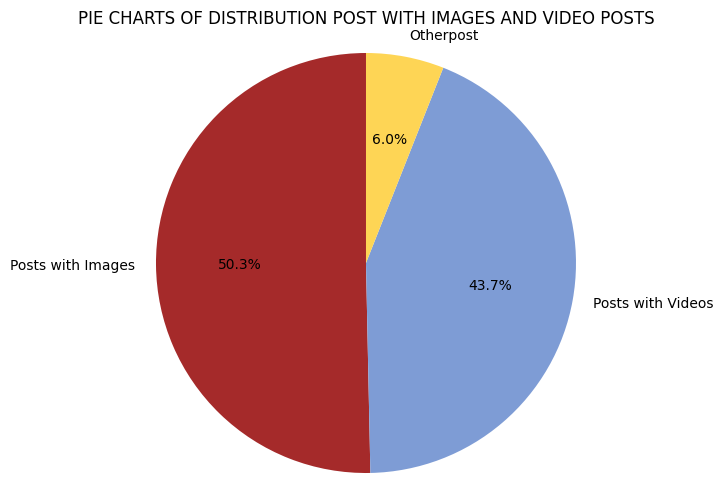

In [13]:
num_other_post = total_post - num_images - num_videos
labels_pie_charts_ss = ['Posts with Images', 'Posts with Videos', 'Otherpost']
sizes_ss = [num_images, num_videos, num_other_post]
colors_ss = ['brown','#7e9cd5','#fed555'] 

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes_ss, labels=labels_pie_charts_ss, colors=colors_ss, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('PIE CHARTS OF DISTRIBUTION POST WITH IMAGES AND VIDEO POSTS')
plt.show()


In [14]:
df[df['video_duration_seconds'].notna()]


,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time


In [15]:
df[df['video_duration_seconds'].notna()]['video_duration_seconds'].dtype


dtype('float64')

In [16]:
df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time'],
      dtype='object')